In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd

In [50]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [52]:
#This parameter typically have one parameter, which is the location of the SQLite database file 
engine = create_engine("sqlite:///hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [54]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [55]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 12, 1)
prev_year = dt.date(2017, 12, 30) - dt.timedelta(days=365)

In [58]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-12-30', 0.12), ('2016-12-31', 0.01), ('2017-01-01', 0.0), ('2017-01-02', 0.0), ('2017-01-03', 0.0), ('2017-01-04', 0.0), ('2017-01-05', 0.0), ('2017-01-06', 0.0), ('2017-01-07', 0.0), ('2017-01-08', 0.0), ('2017-01-09', 0.0), ('2017-01-10', 0.0), ('2017-01-11', 0.0), ('2017-01-12', 0.0), ('2017-01-13', 0.0), ('2017-01-14', 0.0), ('2017-01-15', 0.0), ('2017-01-16', 0.0), ('2017-01-17', 0.0), ('2017-01-18', 0.0), ('2017-01-19', 0.0), ('2017-01-20', 0.0), ('2017-01-21', 0.0), ('2017-01-22', 0.16), ('2017-01-23', 0.0), ('2017-01-24', 0.04), ('2017-01-25', 0.03), ('2017-01-26', 0.0), ('2017-01-27', 0.0), ('2017-01-28', 0.0), ('2017-01-29', 0.18), ('2017-01-30', 0.0), ('2017-01-31', 0.0), ('2017-02-01', 0.0), ('2017-02-02', 0.0), ('2017-02-03', 0.0), ('2017-02-04', 0.0), ('2017-02-05', 0.0), ('2017-02-06', 0.0), ('2017-02-07', 0.51), ('2017-02-08', 0.0), ('2017-02-09', 0.0), ('2017-02-10', 0.0), ('2017-02-11', 0.31), ('2017-02-12', 2.62), ('2017-02-13', 0.01), ('2017-02-14', 0.0), ('

In [59]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','temp'])
df.set_index(df['date'], inplace=True)

print(df.to_string(index=False))

      date  temp
2016-12-30  0.12
2016-12-31  0.01
2017-01-01  0.00
2017-01-02  0.00
2017-01-03  0.00
2017-01-04  0.00
2017-01-05  0.00
2017-01-06  0.00
2017-01-07  0.00
2017-01-08  0.00
2017-01-09  0.00
2017-01-10  0.00
2017-01-11  0.00
2017-01-12  0.00
2017-01-13  0.00
2017-01-14  0.00
2017-01-15  0.00
2017-01-16  0.00
2017-01-17  0.00
2017-01-18  0.00
2017-01-19  0.00
2017-01-20  0.00
2017-01-21  0.00
2017-01-22  0.16
2017-01-23  0.00
2017-01-24  0.04
2017-01-25  0.03
2017-01-26  0.00
2017-01-27  0.00
2017-01-28  0.00
2017-01-29  0.18
2017-01-30  0.00
2017-01-31  0.00
2017-02-01  0.00
2017-02-02  0.00
2017-02-03  0.00
2017-02-04  0.00
2017-02-05  0.00
2017-02-06  0.00
2017-02-07  0.51
2017-02-08  0.00
2017-02-09  0.00
2017-02-10  0.00
2017-02-11  0.31
2017-02-12  2.62
2017-02-13  0.01
2017-02-14  0.00
2017-02-15  0.00
2017-02-16  0.07
2017-02-17  0.00
2017-02-18  0.00
2017-02-19  0.00
2017-02-20  0.00
2017-02-21  0.06
2017-02-22  0.06
2017-02-23  0.01
2017-02-24  0.00
2017-02-25  0.

In [60]:
f = df.sort_index()
print(df.to_string(index=False))

      date  temp
2016-12-30  0.12
2016-12-31  0.01
2017-01-01  0.00
2017-01-02  0.00
2017-01-03  0.00
2017-01-04  0.00
2017-01-05  0.00
2017-01-06  0.00
2017-01-07  0.00
2017-01-08  0.00
2017-01-09  0.00
2017-01-10  0.00
2017-01-11  0.00
2017-01-12  0.00
2017-01-13  0.00
2017-01-14  0.00
2017-01-15  0.00
2017-01-16  0.00
2017-01-17  0.00
2017-01-18  0.00
2017-01-19  0.00
2017-01-20  0.00
2017-01-21  0.00
2017-01-22  0.16
2017-01-23  0.00
2017-01-24  0.04
2017-01-25  0.03
2017-01-26  0.00
2017-01-27  0.00
2017-01-28  0.00
2017-01-29  0.18
2017-01-30  0.00
2017-01-31  0.00
2017-02-01  0.00
2017-02-02  0.00
2017-02-03  0.00
2017-02-04  0.00
2017-02-05  0.00
2017-02-06  0.00
2017-02-07  0.51
2017-02-08  0.00
2017-02-09  0.00
2017-02-10  0.00
2017-02-11  0.31
2017-02-12  2.62
2017-02-13  0.01
2017-02-14  0.00
2017-02-15  0.00
2017-02-16  0.07
2017-02-17  0.00
2017-02-18  0.00
2017-02-19  0.00
2017-02-20  0.00
2017-02-21  0.06
2017-02-22  0.06
2017-02-23  0.01
2017-02-24  0.00
2017-02-25  0.

<AxesSubplot:xlabel='date'>

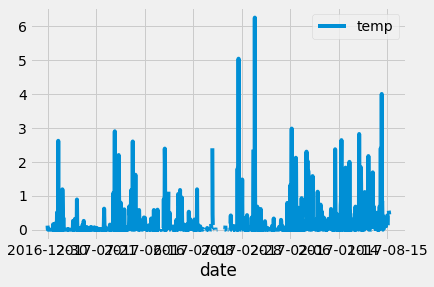

In [61]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [62]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,temp
count,1278.000000
mean,0.168795
std,0.456870
min,0.000000
25%,0.000000
50%,0.000000
75%,0.110000
max,6.250000


In [63]:
# How many stations are available in this dataset?
session.query (func.count(Station.station)).all()

[(9,)]

In [65]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

In [66]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [90]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#extract total observation counts tobs
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [91]:
import numpy as np
import pandas as pd

In [97]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [98]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [100]:
results = sessions.query(Measurement.tobs).\
    filter(Measurement.data == 'USC00519281').\
    filter(Measurement.data >= prev_year).all()
#convert results to a df
#print(df)
df = pd.DateFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

NameError: name 'sessions' is not defined

In [101]:
from pandas.plotting import table
prev_year = dt.data(2017, 12, 1) - dt.tabledelta(days=365)

AttributeError: module 'datetime' has no attribute 'data'

In [109]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
http://localhost:5000/
@app.route("/api/v1.0/tobs")
def temp_monthly():
    return

SyntaxError: invalid syntax (1662485415.py, line 3)

In [110]:
def temp_monthly():
    prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
    results = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= prev_year).all()
    return

In [111]:
def temp_monthly():
    prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
    results = session.query(Measurement.tobs).\
      filter(Measurement.station == 'USC00519281').\
      filter(Measurement.date >= prev_year).all()
    temps = list(np.ravel(results))
    return jsonify(temps=temps)
    
    #flask run

In [112]:
def temp_monthly():
    prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
    return

In [114]:
@app.route("/api/v1.0/temp/<start>=='%Y-%m-%d")
@app.route("/api/v1.0/temp/<start>/<end>=='%Y-%m-%d")
def stats():
     return
    def stats(start=None, end=None):
return
def stats(start=None, end=None):
        sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    def stats(start=None, end=None):
        sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

    if not end:
        results = session.query(*sel).\
            filter(Measurement.date >= start).all()
        temps = list(np.ravel(results))
        return jsonify(temps=temps)
    def stats(start=None, end=None):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

    if not end:
        results = session.query(*sel).\
            filter(Measurement.date >= start).all()
        temps = list(np.ravel(results))
        return jsonify(temps)

    results = session.query(*sel).\
        filter(Measurement.date >= start).\
        filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))
    return jsonify(temps)
flask run
/api/v1.0/temp/

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

# Challenge